In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import os
import sys

import numpy as np
import tensorflow as tf
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import skimage
import skimage.io
%matplotlib inline

print('sys_version', sys.version.replace('\n', ''))
print('virtual_env', os.environ.get('VIRTUAL_ENV', 'None'))
print('pwd', os.getcwd())
print('np ', np.__version__)
print('tf ', tf.__version__)

# fix import src problem
sys.path.append('..')
sns.set_style("whitegrid", {'axes.grid' : False})

sys_version 3.5.2 (default, Nov 17 2016, 17:05:23) [GCC 5.4.0 20160609]
virtual_env /home/marko/.virtualenvs/mozgalo
pwd /home/marko/Projects/mozgalo2017/notebooks
np  1.12.1
tf  1.1.0


# Mozgalo

## Datasets

In [2]:
from src.modules.dataset import *
from src.modules.dataset_utils import *

# print datasets and paths
for name, path in dataset_imgs_root.items():
    
    print('Dataset %s\n\tpath:%s\n\texists?: %s\n' % (name, 
                                                      os.path.abspath(path), 
                                                      os.path.exists(path)))

Dataset mozgalo
	path:/home/marko/Projects/mozgalo2017/dataset/mozgalo_dataset/imgs
	exists?: True

Dataset cifar10
	path:/home/marko/Projects/mozgalo2017/dataset/cifar10/imgs
	exists?: True

Dataset stl10
	path:/home/marko/Projects/mozgalo2017/dataset/stl10/imgs
	exists?: True

Dataset cats_dogs
	path:/home/marko/Projects/mozgalo2017/dataset/cats_dogs/imgs
	exists?: True



## Dataset examples


Dataset: cifar10, n_samples: 50000, n_classes: 10


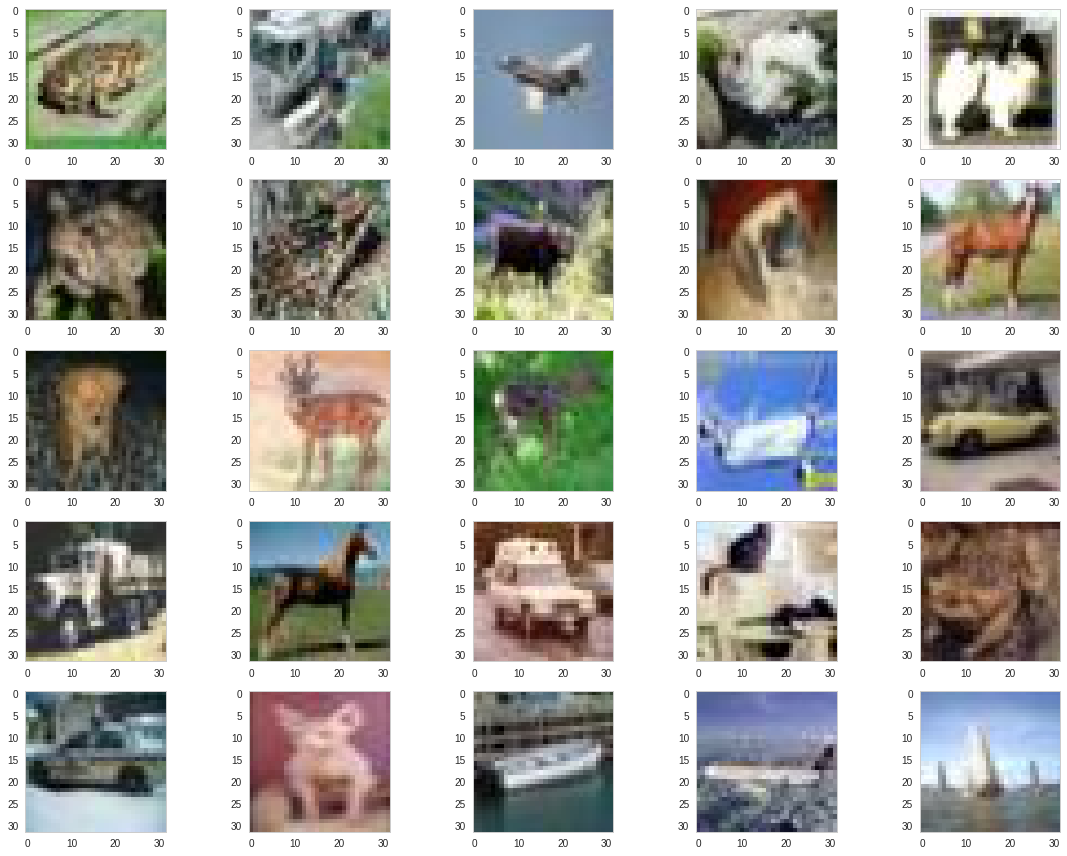


Dataset: stl10, n_samples: 5000, n_classes: 10


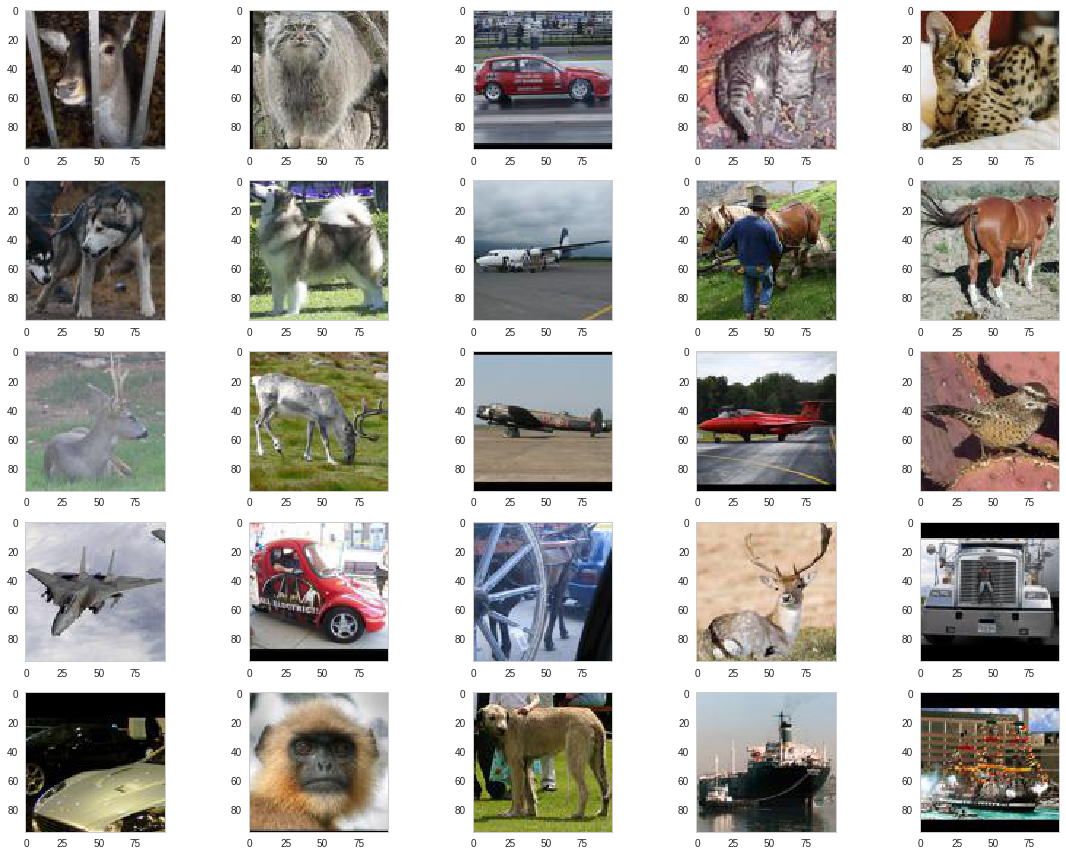


Dataset: mozgalo, n_samples: 6889, n_classes: unknown


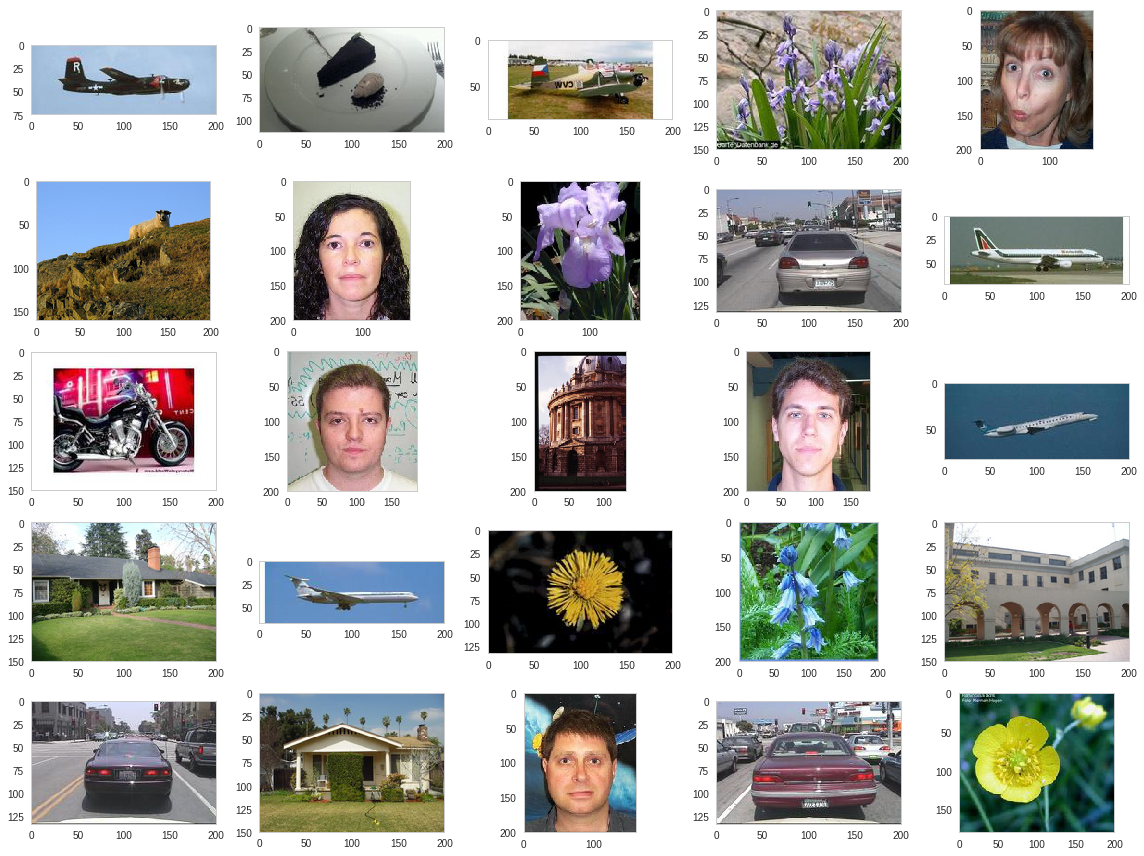


Dataset: cats_dogs, n_samples: 25000, n_classes: 2


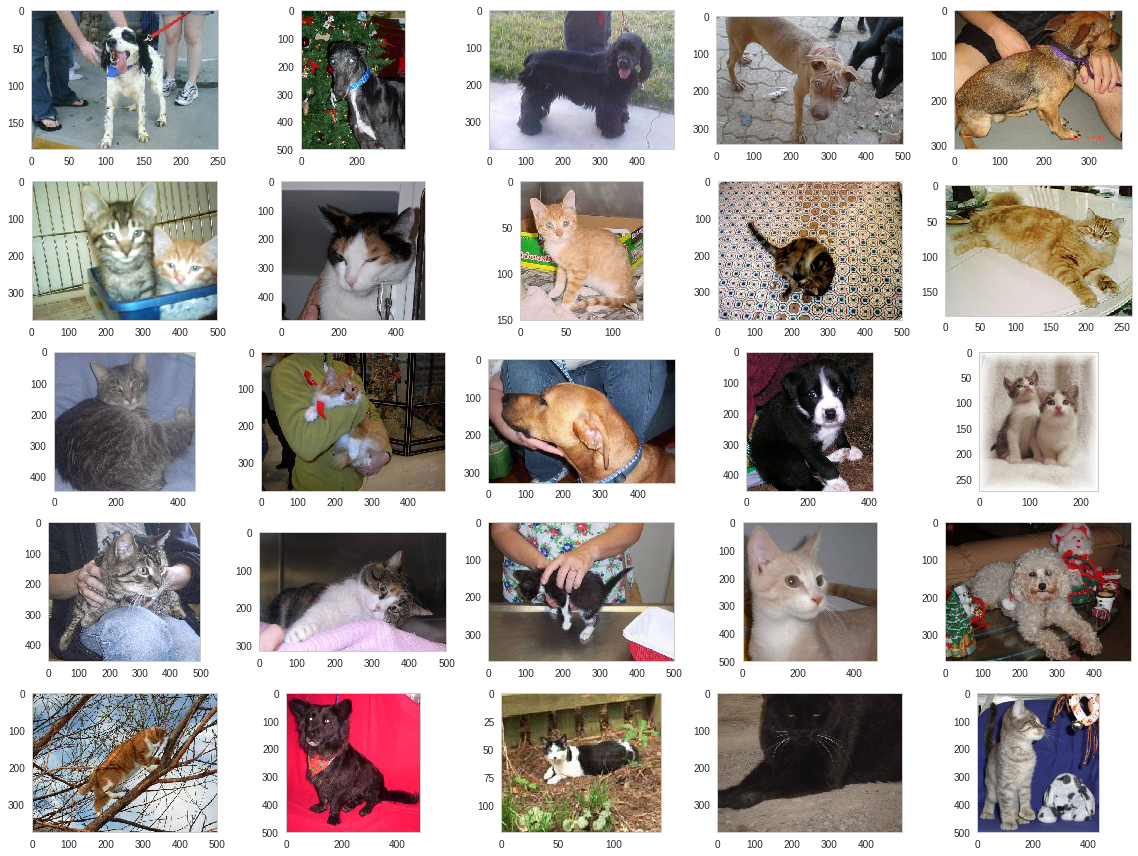

In [4]:
for name, path in dataset_imgs_root.items():
    n_samples = len(os.listdir(path))
    different_classes = get_n_different_classes(name)
    
    print()    
    print("Dataset: %s, n_samples: %s, n_classes: %s" % (name, n_samples, different_classes))
    show_random_sample(path)

## Loading dataset

In [4]:
from src.modules.feature_extractors import inceptionv3, inceptionv4, resnet50
from src.modules.utils import *
from src.modules.dataset import *
init_logging()

# Loading dataset
dataset_name = 'mozgalo'
dataset = ImageDataset(dataset_imgs_root[dataset_name])

Using TensorFlow backend.


## Feature extraction

Define network used to extract features
Implemented options:
 - inceptionv3.InceptionNet()
 - inceptionv4.InceptionNetV4()
 - resnet50.Resnet50()

In [5]:
features_extraction_model = inceptionv3.InceptionNet()
features_extraction_model.create_graph()

### Extracting features and dumping to file

Feature extraction is slow operation, after extraction features are dumped to drive so they can be reused later

In [7]:
# Features for selected dataset and selected model
# create if does not exist
features_path = pickled_features_path(dataset_name, features_extraction_model)

if os.path.exists(features_path):
    logging.info("Reloading cached features")
    dataset.load_features(features_path)
else:
    logging.info("Features not found, extracting")
    dataset.extract_features(features_extraction_model)
    dataset.store_features(features_path)

# debug print caused by skimage when reading RGBA images

2017-05-19 16:34:06 INFO     Reloading cached features
2017-05-19 16:34:07 DEBUG    Loading imgs in dataset


 14%|█▎        | 939/6889 [00:01<00:07, 836.14it/s]

2017-05-19 16:34:08 DEBUG    STREAM b'IHDR' 16 13
2017-05-19 16:34:08 DEBUG    STREAM b'gAMA' 41 4
2017-05-19 16:34:08 DEBUG    STREAM b'sRGB' 57 1
2017-05-19 16:34:08 DEBUG    b'sRGB' 57 1 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'cHRM' 70 32
2017-05-19 16:34:08 DEBUG    b'cHRM' 70 32 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'bKGD' 114 6
2017-05-19 16:34:08 DEBUG    b'bKGD' 114 6 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'pHYs' 132 9
2017-05-19 16:34:08 DEBUG    STREAM b'IDAT' 153 32768


 17%|█▋        | 1205/6889 [00:01<00:06, 843.72it/s]

2017-05-19 16:34:08 DEBUG    STREAM b'IHDR' 16 13
2017-05-19 16:34:08 DEBUG    STREAM b'gAMA' 41 4
2017-05-19 16:34:08 DEBUG    STREAM b'sRGB' 57 1
2017-05-19 16:34:08 DEBUG    b'sRGB' 57 1 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'cHRM' 70 32
2017-05-19 16:34:08 DEBUG    b'cHRM' 70 32 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'bKGD' 114 6
2017-05-19 16:34:08 DEBUG    b'bKGD' 114 6 (unknown)
2017-05-19 16:34:08 DEBUG    STREAM b'pHYs' 132 9
2017-05-19 16:34:08 DEBUG    STREAM b'IDAT' 153 32768


 35%|███▌      | 2422/6889 [00:02<00:05, 784.95it/s]

2017-05-19 16:34:10 DEBUG    STREAM b'IHDR' 16 13
2017-05-19 16:34:10 DEBUG    STREAM b'gAMA' 41 4
2017-05-19 16:34:10 DEBUG    STREAM b'sRGB' 57 1
2017-05-19 16:34:10 DEBUG    b'sRGB' 57 1 (unknown)
2017-05-19 16:34:10 DEBUG    STREAM b'cHRM' 70 32
2017-05-19 16:34:10 DEBUG    b'cHRM' 70 32 (unknown)
2017-05-19 16:34:10 DEBUG    STREAM b'bKGD' 114 6
2017-05-19 16:34:10 DEBUG    b'bKGD' 114 6 (unknown)
2017-05-19 16:34:10 DEBUG    STREAM b'pHYs' 132 9
2017-05-19 16:34:10 DEBUG    STREAM b'IDAT' 153 32768


 69%|██████▊   | 4729/6889 [00:05<00:02, 821.11it/s]

2017-05-19 16:34:13 DEBUG    STREAM b'IHDR' 16 13
2017-05-19 16:34:13 DEBUG    STREAM b'gAMA' 41 4
2017-05-19 16:34:13 DEBUG    STREAM b'sRGB' 57 1
2017-05-19 16:34:13 DEBUG    b'sRGB' 57 1 (unknown)
2017-05-19 16:34:13 DEBUG    STREAM b'cHRM' 70 32
2017-05-19 16:34:13 DEBUG    b'cHRM' 70 32 (unknown)
2017-05-19 16:34:13 DEBUG    STREAM b'bKGD' 114 6
2017-05-19 16:34:13 DEBUG    b'bKGD' 114 6 (unknown)
2017-05-19 16:34:13 DEBUG    STREAM b'pHYs' 132 9
2017-05-19 16:34:13 DEBUG    STREAM b'IDAT' 153 32768


 90%|████████▉ | 6186/6889 [00:07<00:00, 711.23it/s]

2017-05-19 16:34:15 DEBUG    STREAM b'IHDR' 16 13
2017-05-19 16:34:15 DEBUG    STREAM b'gAMA' 41 4
2017-05-19 16:34:15 DEBUG    STREAM b'sRGB' 57 1
2017-05-19 16:34:15 DEBUG    b'sRGB' 57 1 (unknown)
2017-05-19 16:34:15 DEBUG    STREAM b'cHRM' 70 32
2017-05-19 16:34:15 DEBUG    b'cHRM' 70 32 (unknown)
2017-05-19 16:34:15 DEBUG    STREAM b'bKGD' 114 6
2017-05-19 16:34:15 DEBUG    b'bKGD' 114 6 (unknown)
2017-05-19 16:34:15 DEBUG    STREAM b'pHYs' 132 9
2017-05-19 16:34:15 DEBUG    STREAM b'IDAT' 153 32768


100%|██████████| 6889/6889 [00:08<00:00, 774.18it/s]


## Feature extraction sanity check

- for given image find most similar images in dataset

100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


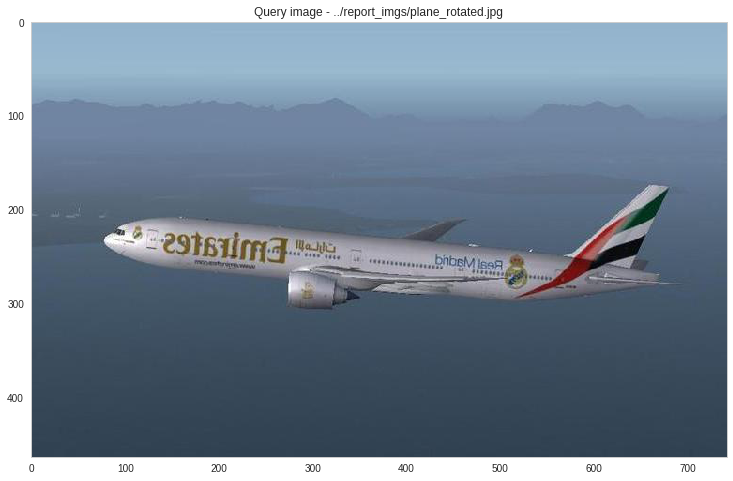

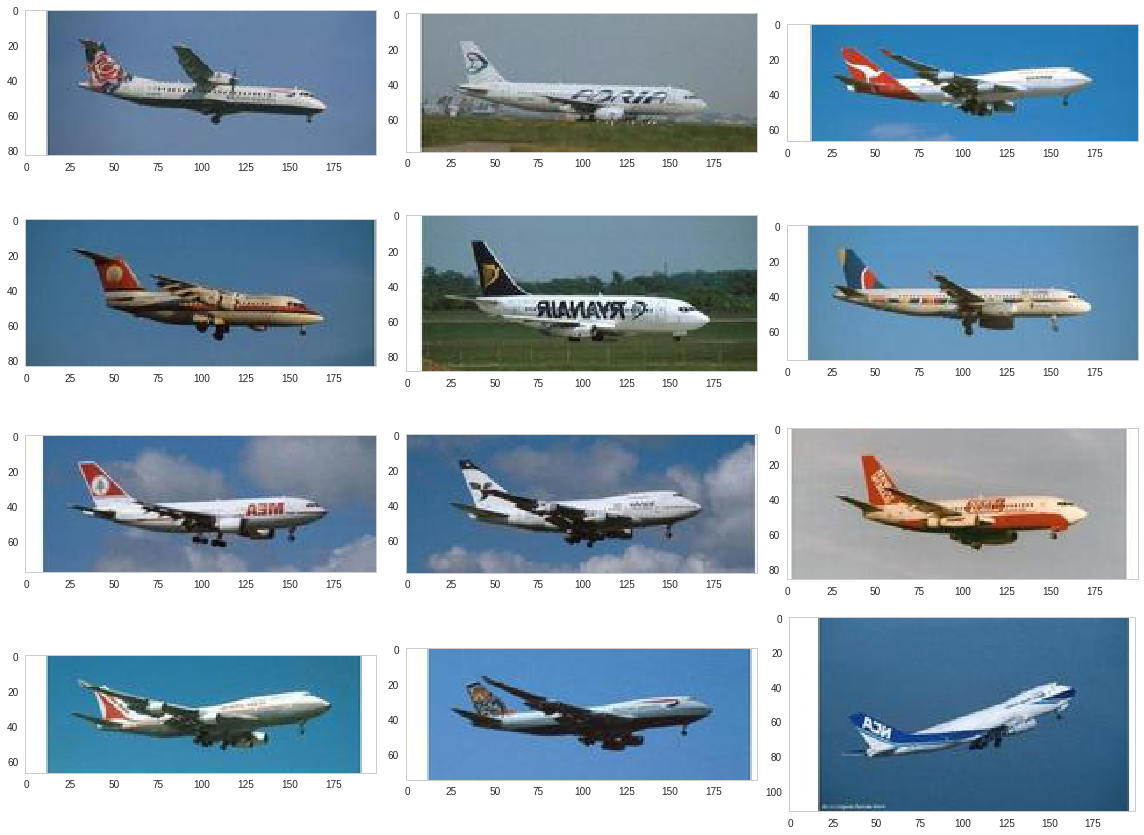

100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


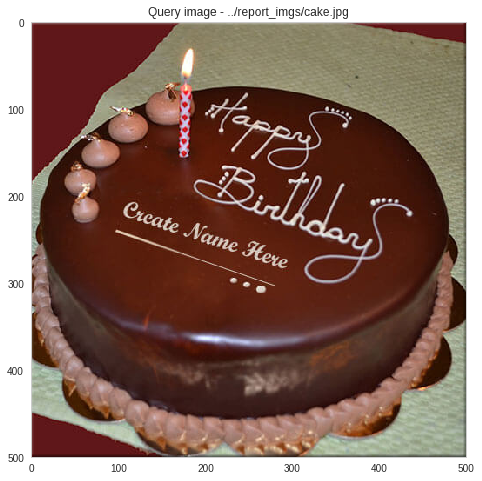

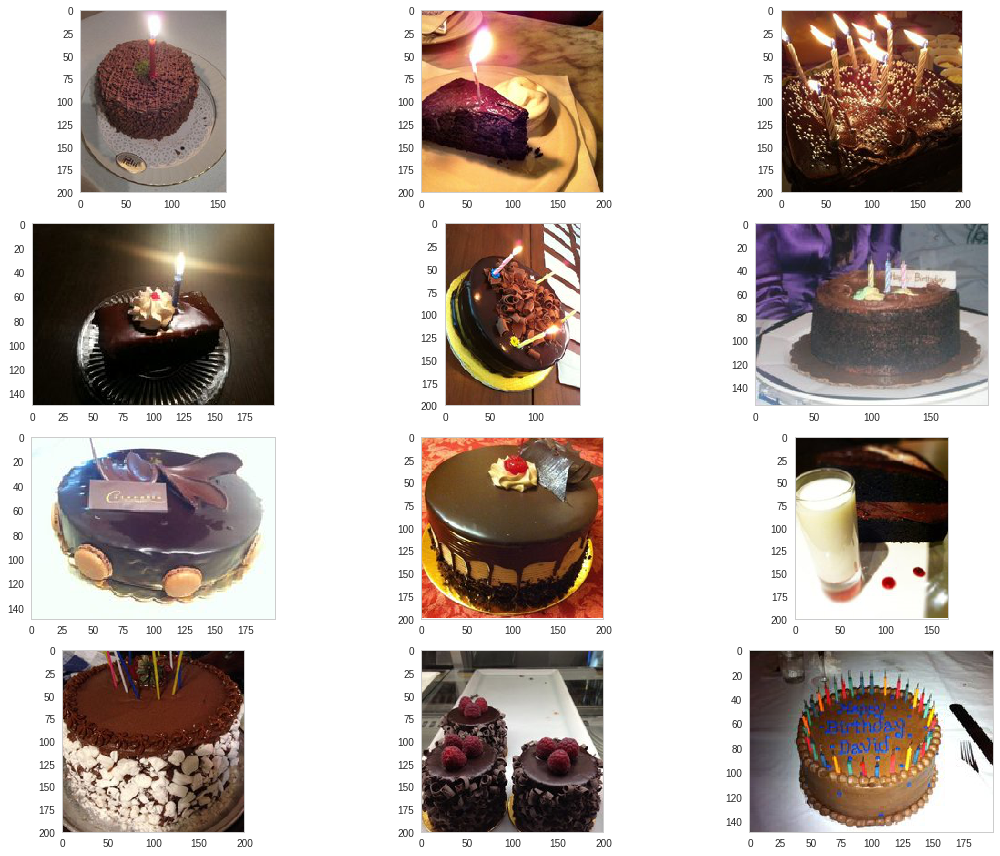

100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


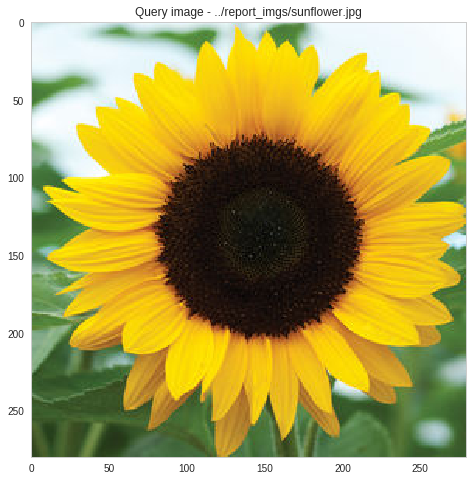

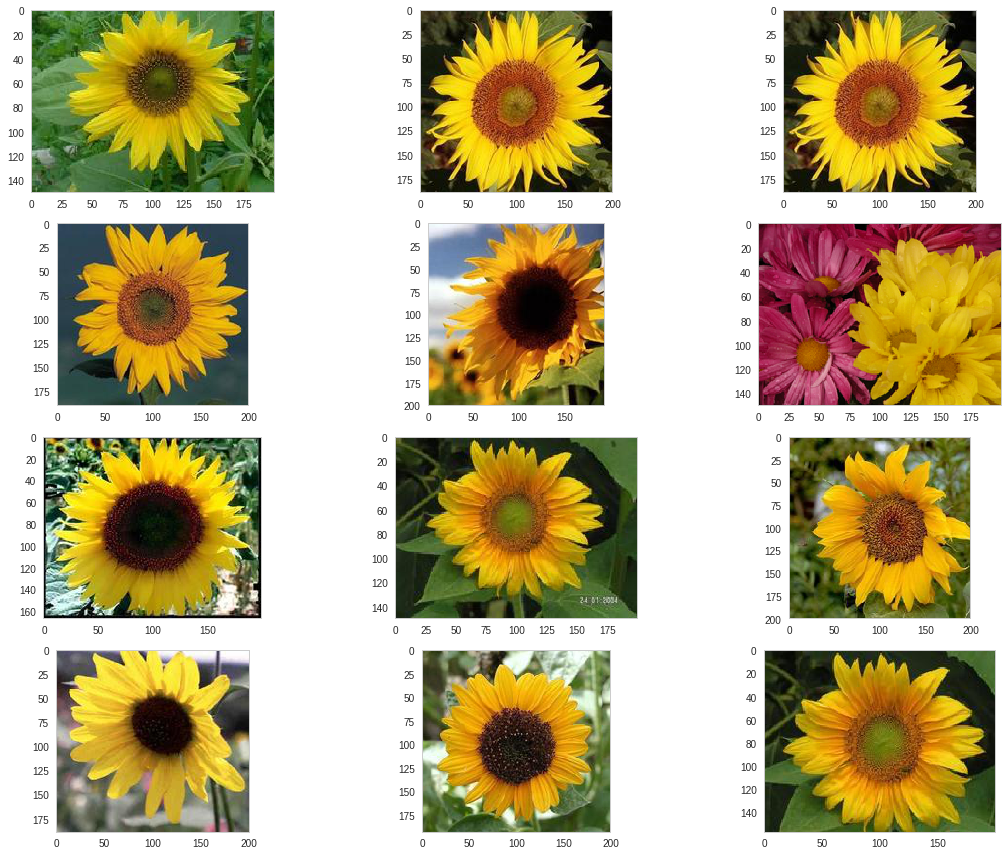

In [10]:
get_features = lambda x: features_extraction_model.extract_features([x])[0]

test_imgs = ['../report_imgs/plane_rotated.jpg', 
             '../report_imgs/cake.jpg', 
             '../report_imgs/sunflower.jpg']


for img in test_imgs:
    plot_closest_results(img, get_features, dataset)


## Evaluation on labeled datasets

Run all models on all labeled datasets and print results

In [16]:
from sklearn.cluster import KMeans

all_results = {}

models = [inceptionv3.InceptionNet(), inceptionv4.InceptionNetV4(), resnet50.Resnet50()]
for model in models:
    model.create_graph()
    results = []
    for name, path in dataset_imgs_root.items():
        n_samples = len(os.listdir(path))
        k = get_n_different_classes(name)

        if str(k) == 'unknown':
            # skip unlabeled datasets
            continue

        logging.info("Running %s", name)
        ds = ImageDataset(dataset_imgs_root[name])

        # get features
        features_path = pickled_features_path(name, model)
        if os.path.exists(features_path):
            # restore, skip loading in case of large dataset
            logging.info("Using cached features")
            ds.load_features(features_path, skip_img_load=True)
        else:
            logging.info("Extracting features")
            ds.extract_features(model)
            ds.store_features(features_path)


        clustering = KMeans(n_clusters=k)
        clustering.fit(ds.features)

        # dump results to dir
        out_dir = os.path.join(CLUSTER_OUT_ROOT, '%s_%s' % (name, model.name))
        ds.save_clusters_to_file(out_dir, clustering.labels_, force_reload=True)
        
        results.append(compare_cluster_to_labels(out_dir, name))
    all_results[model.name] = results

logging.info('Completed')
    

2017-05-19 14:51:38 INFO     Running cifar10
2017-05-19 14:51:42 INFO     Using cached features


 30%|███       | 3/10 [00:13<00:29,  4.15s/it]/home/mratkovic/mozgalo/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: /home/mratkovic/mozgalo2017/src/modules/../../clusters/cifar10_inceptionv3/3/21597.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
100%|██████████| 10/10 [00:42<00:00,  4.48s/it]


2017-05-19 14:56:37 INFO     Running stl10


/home/mratkovic/mozgalo/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mratkovic/mozgalo/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2017-05-19 14:56:37 INFO     Using cached features


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

2017-05-19 14:56:58 INFO     Running cats_dogs


2017-05-19 14:57:00 INFO     Using cached features


100%|██████████| 2/2 [06:29<00:00, 198.44s/it]


TypeError: 'module' object is not callable

In [14]:
results = pd.concat(results, ignore_index=True)
results

dataset  accuracy  precision   recall        F1       ARI
0    cifar10   0.55178   0.521767  0.55178  0.530951  0.311604
1      stl10   0.90380   0.925684  0.90380  0.907453  0.790204
2  cats_dogs   0.98008   0.980709  0.98008  0.980073  0.921904

In [8]:
# preview some missclassified samples
show_random_sample('./cats_dogs_clusters/_wrong/', 36)

FileNotFoundError: [Errno 2] No such file or directory: './cats_dogs_clusters/_wrong/'

# Hierarchical clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,  dendrogram

# generate the linkage matrix
with Timer("Linkage"):
    Z = linkage(dataset.features, 'ward')

2017-05-19 16:42:25 INFO     Duration Linkage 36 s


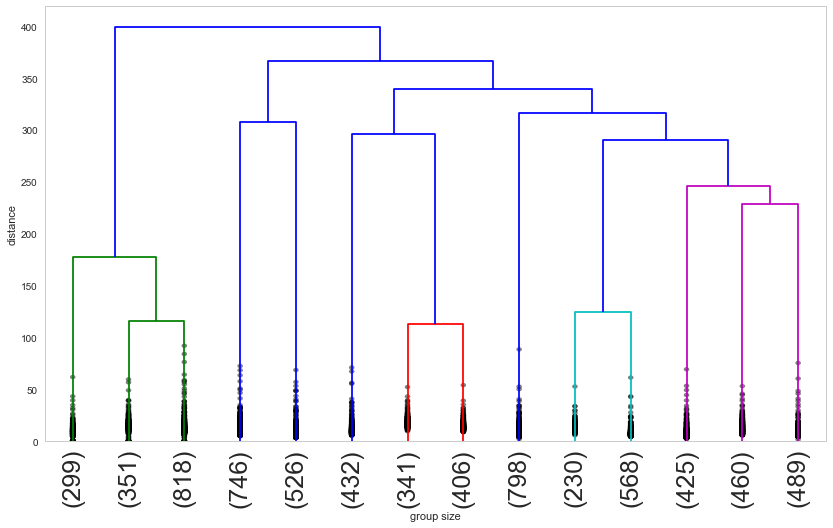

In [13]:
# Plot dendrogram    
plt.figure(figsize=(14, 8))
plt.xlabel('group size')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=14,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=25.,
    show_contracted=True,    
)

plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# try different cluster sizes and dump results to directory
# so we can later observe which clusters represent what in dendrogram
for k in tqdm(range(5, 15)):
    model = AgglomerativeClustering(k)
    model = model.fit(dataset.features)

    # dump results to dir
    out_dir = os.path.join(CLUSTER_OUT_ROOT, 'hac', 'hac_%s' % k)
    dataset.save_clusters_to_file(out_dir, model.labels_)

In [21]:
#print hac clusters by size so they can be matched with dendrogram above
root_dir = '../clusters/hac/'

for grouping_dir in sorted(os.listdir(root_dir)):
    grouping_path = os.path.join(root_dir, grouping_dir)
    clusters = os.listdir(grouping_path)
    
    print(grouping_dir, " N_groups: ", len(clusters))
    for group_dir in sorted(os.listdir(grouping_path)):
        group_path = os.path.join(grouping_path, group_dir)
        print('\t', group_dir, "samples:", len(os.listdir(group_path)))
    print()

hac_10  N_groups:  10
	 0 samples: 1468
	 1 samples: 798
	 2 samples: 747
	 3 samples: 489
	 4 samples: 798
	 5 samples: 746
	 6 samples: 432
	 7 samples: 526
	 8 samples: 425
	 9 samples: 460

hac_11  N_groups:  11
	 0 samples: 798
	 1 samples: 1169
	 10 samples: 798
	 2 samples: 747
	 3 samples: 489
	 4 samples: 299
	 5 samples: 746
	 6 samples: 432
	 7 samples: 526
	 8 samples: 425
	 9 samples: 460

hac_12  N_groups:  12
	 0 samples: 1169
	 1 samples: 489
	 10 samples: 798
	 11 samples: 230
	 2 samples: 747
	 3 samples: 526
	 4 samples: 299
	 5 samples: 746
	 6 samples: 432
	 7 samples: 568
	 8 samples: 425
	 9 samples: 460

hac_13  N_groups:  13
	 0 samples: 747
	 1 samples: 489
	 10 samples: 798
	 11 samples: 230
	 12 samples: 351
	 2 samples: 818
	 3 samples: 526
	 4 samples: 299
	 5 samples: 746
	 6 samples: 432
	 7 samples: 568
	 8 samples: 425
	 9 samples: 460

hac_14  N_groups:  14
	 0 samples: 489
	 1 samples: 299
	 10 samples: 406
	 11 samples: 230
	 12 samples: 351
	 13 sa